## Investigating my Boston Marathon Data

In this notebook I did the majority of my analysis of the Boston Marathon data with the grouped file of the three years (2015, 2016, 2017).

p.s although the name of the notebook says female, there is analysis that also pertains to males in this file.


qualifying times
Men 
* 18-34	3:05:00	3:03:58
* 35-39	3:10:00	3:08:58
* 40-44	3:15:00	3:13:58
* 45-49	3:25:00	3:23:58
* 50-54	3:30:00	3:28:58
* 55-59	3:40:00	3:38:58
* 60-64	3:55:00	3:53:58
* 65-69	4:10:00	4:08:58
* 70-74	4:25:00	4:23:58
* 75-79	4:40:00	4:38:58
* 80+	    4:55:00	4:53:58

Women
* 18-34	3:35:00	3:33:58
* 35-39	3:40:00	3:38:58
* 40-44	3:45:00	3:43:58
* 45-49	3:55:00	3:53:58
* 50-54	4:00:00	3:58:58
* 55-59	4:10:00	4:08:58
* 60-64	4:25:00	4:23:58
* 65-69	4:40:00	4:38:58
* 70-74	4:55:00	4:53:58
* 75-79	5:10:00	5:08:58
* 80+	    5:25:00	5:23:58


These are the qualifying times for runners by age band

These are some of the questions that I looked at with the analysis

* How many participants are there per age group?
* What is the age group with the most participants?
* What is the mean finish time for each age group separated by gender?
* What is the mean finish time difference between males and females in the same age division?
* What percentage of participants keep with their qualifying time on race day?
* What is the time difference between the average of the fastest men and women across all age groups?
* What is the difference between the average of the fastest and slowest women across age groups?
* What is the difference between the average of the fastest and slowest men across age groups?



In [154]:
%matplotlib inline
import pandas as pd 
import matplotlib.pyplot as plt

In [155]:
Yall=pd.read_csv("../data/all_data.csv")

/usr/local/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (9,24) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


loading the data

In [156]:
Yall.columns

Index(['10K', '15K', '20K', '25K', '30K', '35K', '40K', '5K', 'Age', 'Bib',
       'Citizen', 'City', 'Country', 'Division', 'Gender', 'Half', 'M/F',
       'Name', 'Official Time', 'Overall', 'Pace', 'Proj Time', 'State',
       'Unnamed: 0', 'Unnamed: 8', 'Unnamed: 9', 'year'],
      dtype='object')

In [157]:
Yall.head()

,10K,15K,20K,25K,30K,35K,40K,5K,Age,Bib,...,Name,Official Time,Overall,Pace,Proj Time,State,Unnamed: 0,Unnamed: 8,Unnamed: 9,year
0,0:29:43,0:44:57,1:00:29,1:16:07,1:32:00,1:47:59,2:02:39,0:14:43,25,3,...,"Desisa, Lelisa",2:09:17,1,0:04:56,-,NaN,0.0,NaN,NaN,2015
1,0:29:43,0:44:58,1:00:28,1:16:07,1:31:59,1:47:59,2:02:42,0:14:43,30,4,...,"Tsegay, Yemane Adhane",2:09:48,2,0:04:58,-,NaN,1.0,NaN,NaN,2015
2,0:29:43,0:44:57,1:00:29,1:16:07,1:32:00,1:47:59,2:03:01,0:14:43,29,8,...,"Chebet, Wilson",2:10:22,3,0:04:59,-,NaN,2.0,NaN,NaN,2015
3,0:29:44,0:45:01,1:00:29,1:16:07,1:32:00,1:48:03,2:03:47,0:14:43,28,11,...,"Kipyego, Bernard",2:10:47,4,0:05:00,-,NaN,3.0,NaN,NaN,2015
4,0:29:44,0:44:58,1:00:28,1:16:07,1:32:00,1:47:59,2:03:27,0:14:43,32,10,...,"Korir, Wesley",2:10:49,5,0:05:00,-,NaN,4.0,NaN,NaN,2015


* The most important columns in our data are: age, pace, official time, gender, and time at each 5k mark

In [158]:
Yall['Age'].value_counts()


45    3236
46    3039
40    2734
47    2566
50    2498
41    2494
35    2327
42    2318
48    2277
43    2265
36    2188
38    2128
51    2124
37    2108
39    2101
44    2056
49    2018
52    1930
55    1920
29    1906
30    1849
33    1834
31    1779
28    1758
34    1756
27    1755
53    1730
32    1726
26    1709
25    1539
      ... 
23     920
59     788
62     704
22     701
65     536
63     507
21     489
66     387
64     374
67     306
20     264
68     198
70     180
19     137
69     127
71     105
18      62
72      62
73      57
74      45
75      39
76      29
77      19
78      15
80      12
79       7
81       5
82       4
83       3
84       1
Name: Age, Length: 67, dtype: int64

I am looking at the number of participantes per age
* The age group with the most amount of participants is 45 years of age. 
* The age groups with the least amount of participants is 84

In [159]:
Yall['Pace'].describe()

count       79638
unique        611
top       0:08:24
freq          435
Name: Pace, dtype: object

In [160]:
Yall.groupby('M/F')['Age'].value_counts()

M/F  Age
F    45     1403
     40     1352
     46     1294
     41     1268
     35     1219
     42     1141
     37     1114
     36     1109
     38     1092
     47     1088
     29     1082
     27     1077
     43     1077
     26     1060
     39     1054
     28     1040
     30     1022
     50     1017
     25      979
     48      957
     33      947
     44      938
     31      926
     32      888
     34      855
     49      854
     51      832
     24      829
     52      725
     53      619
            ... 
M    25      560
     62      534
     24      472
     65      422
     63      390
     23      330
     66      303
     64      289
     22      279
     67      254
     21      236
     68      164
     70      150
     20      125
     69      107
     71       85
     19       67
     72       56
     73       50
     74       38
     18       32
     75       30
     76       27
     77       18
     78       15
     80       11
     79        7
     

Now I am looking at the number of participants for each age separated by gender 
For Males the most popular age group is 25
For females the most popular age group is 45


In [161]:
age_cuts=[18,35,40,45,50,55,60,65,70,75,80,100]
age_bands=['18-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74','75-79','80 and over']

I am separating the runners by their age bands

In [162]:
len(age_cuts)

12

In [163]:
Yall['Age_band']=pd.cut(Yall['Age'], bins=age_cuts, labels=age_bands, 
       right=False)

In [198]:
per_year = Yall.groupby(['M/F', 'Age_band']).size()

Text(0, 0.5, 'Number of runners')

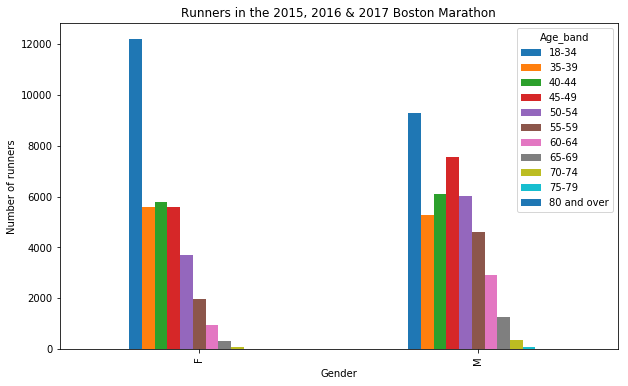

In [213]:
per_year.unstack().plot(kind='bar', stacked=False, figsize=(10,6))
plt.xlabel('Gender')
plt.title ('Runners in the 2015, 2016 & 2017 Boston Marathon')
plt.ylabel ('Number of runners')


Now I have grouped participants by gender and age band
For both male and females the biggest age band is 18-34

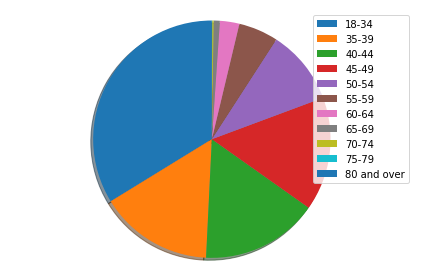

In [194]:
import matplotlib.pyplot as plt

labels = ['18-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74', '75-79', '80 and over']
sizes = [12209, 5588, 5776, 5596, 3683, 1955, 959, 304, 70, 12, 4]
patches, texts = plt.pie(sizes, shadow=True, startangle=90)
plt.legend(patches, labels, loc="best")
plt.axis('equal')
plt.tight_layout()
plt.show()



As indicated I will not use pie charts.
The bar graph above is a much better visualization 

In [ ]:
per_year(['Age_band', 'M/F'])['Offical_Time_Mins'].mean().unstack().plot(kind='bar', color = ('purple', 'blue'))
plt.title ('Mean time by age')
plt.xlabel ('age band')
plt.ylabel ('Time in minutes')

In [ ]:
comp = Yall.groupby(['M/F', 'Age_band']).size()
female_comp = comp.F
perc_of_youngest = (female_comp[0]/female_comp.sum())*100
print(perc_of_youngest)

the 18-34 age band for females accounts for 33.76% of all female participants

In [166]:
comp = Yall.groupby(['M/F', 'Age_band']).size()
male_comp = comp.M
perc_of_youngest = (male_comp[0]/male_comp.sum())*100
print(perc_of_youngest)

21.332965364978612


the 18-34 age band for males accounts for 21.33% of all male participants

In [167]:
comp = Yall.groupby(['M/F', 'Age_band']).size()
female_comp = comp.F
perc_of_youngest = (female_comp[10]/female_comp.sum())*100
print(perc_of_youngest)

0.011063170704723974


the 75-79 age and for females accounts for .011% of all female participants

In [168]:
comp = Yall.groupby(['M/F', 'Age_band']).size()
male_comp = comp.M
perc_of_youngest = (male_comp[10]/male_comp.sum())*100
print(perc_of_youngest)

0.048295846557196084


the 75-79 age and for females accounts for .048% of all female participants

In [169]:
def time_str_to_mins(tstr):
    '''
    convert a string with a race time of the form
    H:M:S, e.g. 3:43:20 to the number of minute
    H*60 + M + S/60
    '''
    
    H,M,S = tstr.split(':')
    
    total_minutes = int(H)*60 + int(M) + int(S)/60
    
    return total_minutes

In [170]:
t="3:24:12"
t.split(':')

['3', '24', '12']

I am converting the time from a string into numbers that I can later use

In [171]:
time_str_to_mins(t)

204.2

In [172]:
Yall['Offical_Time_Mins']=Yall['Official Time'].map(time_str_to_mins)

In [173]:
Yall['Offical_Time_Mins'].mean()

233.16548611634266

The mean time is 233.16 minutes which is equivalent to 3:53

In [176]:
groupped=Yall.groupby(['Age_band', 'M/F'])['Offical_Time_Mins'].mean().unstack()

In [177]:
groupped

M/F,F,M
Age_band,,
18-34,238.998180,209.131891
35-39,236.801265,212.023290
40-44,241.507774,215.308822
45-49,247.072177,221.463258
50-54,252.409960,229.582725
55-59,262.313052,238.102737
60-64,274.393709,251.629118
65-69,288.726371,266.353960
70-74,300.986905,283.979376


I am now looking at the official mean time for both males and females 

In [178]:
groupped['F'].mean()

272.6805254717439

In [179]:
groupped['M'].mean()

247.497114825823

In [184]:
height = [247.497114825823, 272.6805254717439]
bars = ('Men', 'Women')
y_poss = np.arange(len(bars))

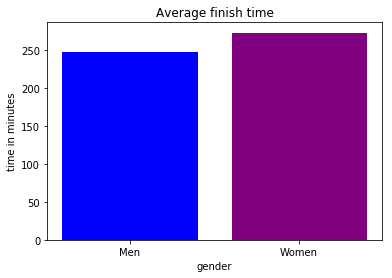

In [185]:
plt.bar(y_poss, height, color=['blue', 'purple'])
plt.xticks(y_poss, bars)
plt.title('Average finish time')
plt.xlabel('gender')
plt.ylabel('time in minutes')
plt.show()

This bar chart illustrates the mean difference between male and female runners

In [24]:
Yall.groupby(['Age_band', 'M/F']).size().unstack()

M/F,F,M
Age_band,,
18-34,12209,9276
35-39,5588,5264
40-44,5776,6091
45-49,5596,7540
50-54,3683,6032
55-59,1955,4598
60-64,959,2934
65-69,304,1250
70-74,70,379


I am again looking at the amount of participants per age band

Text(0, 0.5, 'Time in minutes')

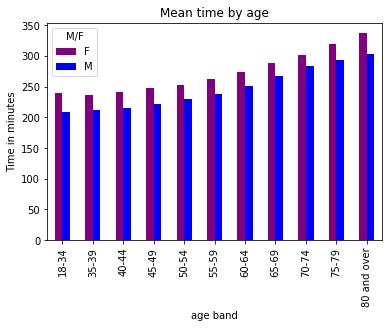

In [188]:
Yall.groupby(['Age_band', 'M/F'])['Offical_Time_Mins'].mean().unstack().plot(kind='bar', color = ('purple', 'blue'))
plt.title ('Mean time by age')
plt.xlabel ('age band')
plt.ylabel ('Time in minutes')


This graph illustrates the mean time by age group for both males and females.
We can see that females are always slower than men

In [26]:
Yall.groupby(['Age_band', 'M/F'])['Offical_Time_Mins'].mean().unstack().diff(-1, axis=1)

M/F,F,M
Age_band,,
18-34,29.866290,NaN
35-39,24.777974,NaN
40-44,26.198952,NaN
45-49,25.608918,NaN
50-54,22.827235,NaN
55-59,24.210315,NaN
60-64,22.764590,NaN
65-69,22.372411,NaN
70-74,17.007529,NaN


This chart illustrates the mean difference between men and women by age group 

In [27]:
time_diff = Yall.groupby(['Age_band', 'M/F'])['Offical_Time_Mins'].mean().unstack().diff(-1, axis=1)
female_time_diff = time_diff.F
print(female_time_diff.mean())

25.183410645920915


Overall women are only 25.18 minutes slower than man.
However as illustrated above that changes by age group
This answers my main research question: women are not 30 minutes slower than men on average 

In [28]:
Yall['Offical_Time_Mins']

0        129.283333
1        129.800000
2        130.366667
3        130.783333
4        130.816667
5        130.866667
6        131.333333
7        132.700000
8        133.583333
9        133.866667
10       133.866667
11       134.283333
12       136.416667
13       138.033333
14       138.733333
15       139.200000
16       139.283333
17       140.066667
18       140.416667
19       140.583333
20       140.700000
21       141.166667
22       141.266667
23       141.966667
24       142.083333
25       142.500000
26       143.350000
27       144.616667
28       144.733333
29       144.816667
            ...    
79608    369.633333
79609    370.316667
79610    373.433333
79611    373.433333
79612    374.083333
79613    376.066667
79614    376.083333
79615    376.833333
79616    376.933333
79617    382.216667
79618    382.216667
79619    384.050000
79620    386.516667
79621    387.166667
79622    393.066667
79623    397.800000
79624    398.416667
79625    402.066667
79626    404.816667


I will now carry out an analysis to see how many women (percentage) actually run the race within their required qualifying time 
(the same analysis was carried out for men in a separate notebook "COMM318_Final_Project//data_analysis/all_years_marathon_data_male.ipynb")

In [29]:
female = Yall['M/F']=='F'
age18_34 = Yall['Age_band']=='18-34'
on_time_f_34=sum(Yall[female & age18_34]['Offical_Time_Mins']<=215)

In [30]:
on_time_f_34


4347

In [31]:
Yall[female & age18_34]['Offical_Time_Mins'].shape

(12209,)

35.6% of women in this age group ran within their qualifying time

In [32]:
female = Yall['M/F']=='F'
age35_39 = Yall['Age_band']=='35-39'
on_time_f_39=sum(Yall[female & age35_39]['Offical_Time_Mins']<=220)

In [33]:
on_time_f_39

2163

In [34]:
Yall[female & age35_39]['Offical_Time_Mins'].shape

(5588,)

38.70% of women in this age group ran within their qualifying time

In [35]:
female = Yall['M/F']=='F'
age40_44 = Yall['Age_band']=='40-44'
on_time_f_44=sum(Yall[female & age40_44]['Offical_Time_Mins']<=225)

In [36]:
on_time_f_44

2130

In [37]:
Yall[female & age40_44]['Offical_Time_Mins'].shape

(5776,)

36.87% of women in this age group ran within their qualifying time

In [38]:
female = Yall['M/F']=='F'
age45_49 = Yall['Age_band']=='45-49'
on_time_f_49=sum(Yall[female & age45_49]['Offical_Time_Mins']<=235)

In [39]:
on_time_f_49

2329

In [40]:
Yall[female & age45_49]['Offical_Time_Mins'].shape

(5596,)

41.61% of women in this age group ran within their qualifying time

In [41]:
female = Yall['M/F']=='F'
age50_54 = Yall['Age_band']=='50-54'
on_time_f_54=sum(Yall[female & age50_54]['Offical_Time_Mins']<=240)

In [42]:
on_time_f_54

1490

In [43]:
Yall[female & age50_54]['Offical_Time_Mins'].shape

(3683,)

40.45% of women in this age group ran within their qualifying time

In [44]:
female = Yall['M/F']=='F'
age55_59 = Yall['Age_band']=='55-59'
on_time_f_59=sum(Yall[female & age55_59]['Offical_Time_Mins']<=250)

In [45]:
on_time_f_59

753

In [46]:
Yall[female & age55_59]['Offical_Time_Mins'].shape

(1955,)

38.51% of women in this age group ran within their qualifying time

In [47]:
female = Yall['M/F']=='F'
age60_64 = Yall['Age_band']=='60-64'
on_time_f_64=sum(Yall[female & age60_64]['Offical_Time_Mins']<=265)

In [48]:
on_time_f_64

413

In [49]:
Yall[female & age60_64]['Offical_Time_Mins'].shape

(959,)

43.06% of women in this age group ran within their qualifying time

In [50]:
female = Yall['M/F']=='F'
age65_69 = Yall['Age_band']=='65-69'
on_time_f_69=sum(Yall[female & age65_69]['Offical_Time_Mins']<=280)

In [51]:
on_time_f_69

127

In [52]:
Yall[female & age65_69]['Offical_Time_Mins'].shape

(304,)

41.77% of women in this age group ran within their qualifying time

In [53]:
female = Yall['M/F']=='F'
age70_74 = Yall['Age_band']=='70-74'
on_time_f_74=sum(Yall[female & age70_74]['Offical_Time_Mins']<=295)

In [54]:
on_time_f_74

28

In [55]:
Yall[female & age70_74]['Offical_Time_Mins'].shape

(70,)

40.0% of women in this age group ran within their qualifying time

In [56]:
female = Yall['M/F']=='F'
age75_79 = Yall['Age_band']=='75-79'
on_time_f_79=sum(Yall[female & age75_79]['Offical_Time_Mins']<=310)

In [57]:
on_time_f_79

6

In [58]:
Yall[female & age75_79]['Offical_Time_Mins'].shape

(12,)

75.0% of women in this age group ran within their qualifying time

In [59]:
female = Yall['M/F']=='F'
age80 = Yall['Age_band']=='80 and over'
on_time_f_80=sum(Yall[female & age80]['Offical_Time_Mins']<=325)

In [60]:
on_time_f_80


1

In [61]:
Yall[female & age80]['Offical_Time_Mins'].shape

(4,)

25.0% of women in this age group ran within their qualifying time

After having run this analysis we can see that most women runners (and men) do not run within their required qualifying times 

In [29]:
run=pd.read_csv("../data/%_runners.csv")

In [30]:
run

,Age_Band,% Female,% Male
0,18-34,35.60,39.42
1,35-39,38.70,36.93
2,40-44,36.87,36.98
3,45-49,41.61,38.20
4,50-54,40.45,33.27
5,55-59,38.51,33.79
6,60-64,43.06,34.96
7,65-69,41.77,37.84
8,70-74,40.00,31.92
9,75-79,75.00,40.20


I created a .csv file with all the male and female percentages of runners who finished within their qualifying time
I then imported the data and did this chart to compare the percentages 

In [31]:
finish_percentF = run['% Female'].mean()
print(finish_percentF)

41.50636363636364


In [32]:
finish_percentM = run['% Male'].mean()
print(finish_percentM)

38.24090909090909


In [33]:
(finish_percentF + finish_percentM)/2

39.873636363636365

Overall 39.87% of runners of The Boston Marathon (2015, 2016, 2017) finished the race within their qualifying times.
And women are 3.26% more likely to finish on time than men are

Text(0, 0.5, 'percentage%')

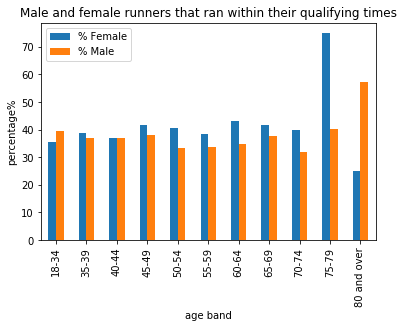

In [151]:
run[['% Female', '% Male']].plot(kind='bar')
plt.xticks(range(11),run['Age_Band']);
plt.title ('Male and female runners that ran within their qualifying times')
plt.xlabel ('age band')
plt.ylabel ('percentage%')




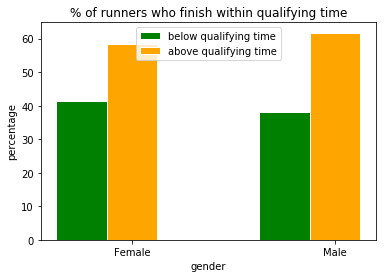

In [225]:
import numpy as np
import matplotlib.pyplot as plt

barWidth = 0.25
bars1 = [41.5, 38.24]
bars2 = [58.5, 61.76]

r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]

plt.bar(r1, bars1, color='green', width=barWidth, edgecolor='white', label='below qualifying time')
plt.bar(r2, bars2, color='orange', width=barWidth, edgecolor='white', label='above qualifying time')
plt.xlabel('gender')
plt.ylabel('percentage')
plt.title('% of runners who finish within qualifying time')
plt.xticks([r + barWidth for r in range(len(bars1))], ['Female', 'Male'])
plt.legend(loc='upper center')
plt.show()






This graph plots the amount of male and female runners that ran within their qualifying times by age group.
We see a huge disparity at the end with the oldest runners.

Text(0, 0.5, 'Percentage')

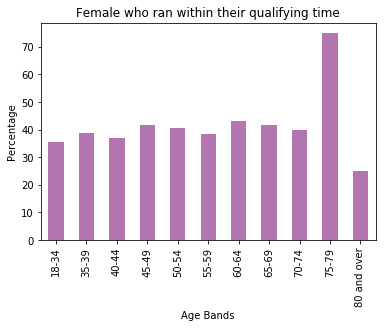

In [35]:
run['% Female'].plot(kind='bar', color = (0.5,0.1,0.5,0.6))
plt.xticks(range(11), run ['Age_Band']);
plt.title('Female who ran within their qualifying time')
plt.xlabel('Age Bands')
plt.ylabel('Percentage')


This graph illustrates only the females who ran within their qualifying time

Text(0, 0.5, 'Percentage')

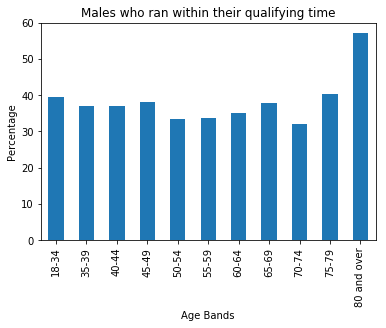

In [37]:
 run['% Male'].plot(kind='bar')
plt.xticks(range(11), run ['Age_Band']);
plt.title('Males who ran within their qualifying time')
plt.xlabel('Age Bands')
plt.ylabel('Percentage')

This graph illustrates only the males who ran within their qualifying time

In [66]:
run['% Female'].mean()

41.50636363636364

In [67]:
run['% Male'].mean()

38.24090909090909

I then started an analysis to compare the fastest and slowest runner per age band and gender

In [68]:
top_10= Yall.nsmallest(10, 'Offical_Time_Mins')

In [39]:
top_10["Name"]

NameError: name 'top_10' is not defined

In [40]:
female_df = Yall[Yall['M/F'] == 'F']
female_df.head(10)

,10K,15K,20K,25K,30K,35K,40K,5K,Age,Bib,...,Overall,Pace,Proj Time,State,Unnamed: 0,Unnamed: 8,Unnamed: 9,year,Age_band,Offical_Time_Mins
30,0:34:24,0:51:49,1:09:00,1:26:08,1:43:24,2:00:50,2:17:30,0:16:59,30,F11,...,31,0:05:32,-,NaN,30.0,NaN,NaN,2015,18-34,144.916667
31,0:34:23,0:51:48,1:09:00,1:26:08,1:43:23,2:00:50,2:17:30,0:16:58,25,F2,...,32,0:05:32,-,NaN,31.0,NaN,NaN,2015,18-34,144.983333
33,0:34:23,0:51:49,1:09:01,1:26:09,1:43:24,2:00:50,2:17:30,0:16:57,27,F1,...,34,0:05:33,-,NaN,33.0,NaN,NaN,2015,18-34,145.150000
39,0:34:24,0:51:48,1:09:00,1:26:08,1:43:23,2:00:49,2:17:51,0:17:00,31,F10,...,40,0:05:34,-,MI,39.0,NaN,NaN,2015,18-34,145.650000
43,0:34:24,0:51:49,1:09:01,1:26:09,1:43:24,2:00:50,2:18:02,0:16:59,31,F8,...,44,0:05:35,-,NaN,43.0,NaN,NaN,2015,18-34,146.083333
51,0:34:23,0:51:48,1:09:00,1:26:08,1:43:23,2:00:50,2:18:11,0:16:58,34,F9,...,52,0:05:36,-,NaN,51.0,NaN,NaN,2015,18-34,146.666667
53,0:34:23,0:51:49,1:09:00,1:26:08,1:43:24,2:00:50,2:18:11,0:16:58,28,F3,...,54,0:05:37,-,NaN,53.0,NaN,NaN,2015,18-34,146.866667
57,0:34:23,0:51:49,1:09:00,1:26:08,1:43:24,2:00:50,2:18:21,0:16:58,19,F6,...,58,0:05:37,-,NaN,57.0,NaN,NaN,2015,18-34,147.233333
61,0:34:24,0:51:49,1:09:01,1:26:09,1:43:34,2:01:35,2:19:45,0:16:58,33,F4,...,62,0:05:39,-,OR,61.0,NaN,NaN,2015,18-34,147.783333
74,0:34:23,0:51:48,1:09:00,1:26:08,1:43:23,2:00:50,2:18:54,0:16:58,26,F16,...,75,0:05:42,-,NaN,74.0,NaN,NaN,2015,18-34,149.116667


In [41]:
female_df["Name"]

30               Rotich, Caroline
31                   Dibaba, Mare
33                 Deba, Buzunesh
39                Linden, Desiree
43                 Cherop, Sharon
51                Kilel, Caroline
53                  Kebede, Aberu
57                  Demise, Shure
61              Flanagan, Shalane
74               Chepkirui, Joyce
77             Duliba, Aleksandra
145                   Nemec, Lisa
223               Nelson, Adriana
235                 Amako, Megumi
303             Dionne, Hilary K.
329             Philbrook, Lauren
472          Phillips, Caitlin E.
497                 Zimmer, Lissa
597               Misuraca, Katie
608            Duhon, Madeline E.
626           Hunter-Galvan, Liza
664               Ryan, Elizabeth
666              Uchiyama, Mayumi
736                        Li, Ji
737                  Green, Amber
741              D'Addario, Emily
769                   Olaru, Nuta
778             Sandahl, Denise M
789            Rediger, Andrea K.
801           

In [42]:
female_df.tail(10)

,10K,15K,20K,25K,30K,35K,40K,5K,Age,Bib,...,Overall,Pace,Proj Time,State,Unnamed: 0,Unnamed: 8,Unnamed: 9,year,Age_band,Offical_Time_Mins
79606,1:00:15,1:43:35,2:29:10,3:11:56,3:59:04,4:55:46,5:49:40,0:28:25,58,24454,...,26380,0:14:05,-,OH,26378.0,NaN,NaN,2017,55-59,369.250000
79607,1:16:31,2:06:13,2:49:36,3:33:25,4:20:03,5:05:47,5:50:25,0:36:22,63,24952,...,26381,0:14:06,-,NL,26379.0,NaN,NaN,2017,60-64,369.583333
79608,1:10:13,1:45:52,2:22:29,3:04:43,3:58:21,4:55:14,5:47:30,0:34:14,42,25779,...,26382,0:14:06,-,MA,26380.0,NaN,NaN,2017,40-44,369.633333
79609,1:14:23,1:54:27,2:37:05,3:19:46,4:09:29,5:07:11,5:51:19,0:35:07,60,24894,...,26383,0:14:08,-,AB,26381.0,NaN,NaN,2017,60-64,370.316667
79610,1:09:43,1:49:08,2:31:17,3:37:13,4:25:58,5:12:27,5:55:04,0:33:30,48,23144,...,26384,0:14:15,-,NaN,26382.0,NaN,NaN,2017,45-49,373.433333
79613,1:11:09,1:50:57,2:34:14,3:22:39,4:15:26,5:07:51,5:55:05,0:33:59,37,26889,...,26387,0:14:21,-,MA,26385.0,NaN,NaN,2017,35-39,376.066667
79624,1:17:02,2:05:58,2:52:33,3:43:32,4:37:51,5:31:18,6:18:21,0:35:47,44,25262,...,26398,0:15:12,-,TX,26396.0,NaN,MI,2017,40-44,398.416667
79627,1:27:45,2:18:03,3:05:52,3:55:50,4:47:35,5:38:32,6:25:56,0:42:31,49,25263,...,26401,0:15:31,-,GA,26399.0,NaN,MI,2017,45-49,406.500000
79633,1:35:41,2:23:35,3:12:44,4:12:06,5:03:08,5:55:18,6:46:57,0:46:44,61,25166,...,26407,0:16:24,-,CA,26405.0,NaN,MI,2017,60-64,429.650000
79635,1:43:36,2:32:36,-,4:15:21,5:06:37,6:00:33,6:54:38,0:53:11,57,27086,...,26409,0:16:47,-,PA,26407.0,NaN,NaN,2017,55-59,439.616667


In [43]:
f_2015 = female_df[female_df['year'] == 2015]

In [44]:
f_2015

,10K,15K,20K,25K,30K,35K,40K,5K,Age,Bib,...,Overall,Pace,Proj Time,State,Unnamed: 0,Unnamed: 8,Unnamed: 9,year,Age_band,Offical_Time_Mins
30,0:34:24,0:51:49,1:09:00,1:26:08,1:43:24,2:00:50,2:17:30,0:16:59,30,F11,...,31,0:05:32,-,NaN,30.0,NaN,NaN,2015,18-34,144.916667
31,0:34:23,0:51:48,1:09:00,1:26:08,1:43:23,2:00:50,2:17:30,0:16:58,25,F2,...,32,0:05:32,-,NaN,31.0,NaN,NaN,2015,18-34,144.983333
33,0:34:23,0:51:49,1:09:01,1:26:09,1:43:24,2:00:50,2:17:30,0:16:57,27,F1,...,34,0:05:33,-,NaN,33.0,NaN,NaN,2015,18-34,145.150000
39,0:34:24,0:51:48,1:09:00,1:26:08,1:43:23,2:00:49,2:17:51,0:17:00,31,F10,...,40,0:05:34,-,MI,39.0,NaN,NaN,2015,18-34,145.650000
43,0:34:24,0:51:49,1:09:01,1:26:09,1:43:24,2:00:50,2:18:02,0:16:59,31,F8,...,44,0:05:35,-,NaN,43.0,NaN,NaN,2015,18-34,146.083333
51,0:34:23,0:51:48,1:09:00,1:26:08,1:43:23,2:00:50,2:18:11,0:16:58,34,F9,...,52,0:05:36,-,NaN,51.0,NaN,NaN,2015,18-34,146.666667
53,0:34:23,0:51:49,1:09:00,1:26:08,1:43:24,2:00:50,2:18:11,0:16:58,28,F3,...,54,0:05:37,-,NaN,53.0,NaN,NaN,2015,18-34,146.866667
57,0:34:23,0:51:49,1:09:00,1:26:08,1:43:24,2:00:50,2:18:21,0:16:58,19,F6,...,58,0:05:37,-,NaN,57.0,NaN,NaN,2015,18-34,147.233333
61,0:34:24,0:51:49,1:09:01,1:26:09,1:43:34,2:01:35,2:19:45,0:16:58,33,F4,...,62,0:05:39,-,OR,61.0,NaN,NaN,2015,18-34,147.783333
74,0:34:23,0:51:48,1:09:00,1:26:08,1:43:23,2:00:50,2:18:54,0:16:58,26,F16,...,75,0:05:42,-,NaN,74.0,NaN,NaN,2015,18-34,149.116667


In [45]:
fastest_timesf=female_df.loc[female_df.groupby('Age_band' )['Offical_Time_Mins'].idxmin()]

In [46]:
fastest_timesf

,10K,15K,20K,25K,30K,35K,40K,5K,Age,Bib,...,Overall,Pace,Proj Time,State,Unnamed: 0,Unnamed: 8,Unnamed: 9,year,Age_band,Offical_Time_Mins
53251,0:34:58,0:51:55,1:08:50,1:25:50,1:42:40,1:59:15,2:15:42,0:17:45,27,F11,...,24,0:05:27,-,NaN,23.0,NaN,NaN,2017,18-34,142.850000
53248,0:34:58,0:51:55,1:08:50,1:25:51,1:42:40,1:58:41,2:14:43,0:17:46,37,F3,...,21,0:05:25,-,NaN,20.0,NaN,NaN,2017,35-39,141.866667
53342,0:36:24,0:54:49,1:12:56,1:31:20,1:50:10,2:09:24,2:28:08,0:18:05,40,F103,...,115,0:05:59,-,MI,114.0,NaN,NaN,2017,40-44,156.466667
626,0:38:10,0:57:37,1:17:18,1:36:53,1:57:08,2:17:43,2:37:40,0:18:54,45,F119,...,627,0:06:22,-,TX,626.0,NaN,NaN,2015,45-49,166.733333
1243,0:40:17,1:00:21,1:20:31,1:40:36,2:01:20,2:22:39,2:43:26,0:20:17,51,981,...,1244,0:06:36,-,CA,1243.0,NaN,NaN,2015,50-54,172.850000
1413,0:38:57,0:59:06,1:19:36,1:40:55,2:01:53,2:23:17,2:44:16,0:19:19,57,1999,...,1414,0:06:39,-,ME,1413.0,NaN,NaN,2015,55-59,174.050000
5254,0:43:13,1:05:16,1:27:40,1:50:13,2:13:37,2:37:43,3:01:58,0:21:38,60,7303,...,5255,0:07:22,-,CT,5254.0,NaN,NaN,2015,60-64,192.850000
37079,0:49:13,1:14:31,1:40:05,2:05:52,2:32:35,3:00:22,3:27:36,0:25:02,65,25398,...,10481,0:08:22,3:39:01,CA,NaN,NaN,NaN,2016,65-69,219.016667
43564,0:52:10,1:20:33,1:49:53,2:18:45,2:48:41,3:19:03,3:47:54,0:25:35,70,22191,...,16966,0:09:11,4:00:40,NaN,NaN,NaN,NaN,2016,70-74,240.666667
22620,0:53:44,1:21:28,1:50:25,2:20:29,2:53:21,3:32:57,4:09:48,0:26:35,76,25249,...,22621,0:10:11,-,BC,22620.0,NaN,NaN,2015,75-79,266.600000


In [47]:
fastest_timesf['Name']

53251          Chelimo, Rose
53248         Kiplagat, Edna
53342           McMahan, Dot
626      Hunter-Galvan, Liza
1243        Hitchings, Jenny
1413         Samuelson, Joan
5254             Vos, Sharon
37079    Gilbert, Sharlet L.
43564        Nicholls, Susan
22620           Borrett, Liz
50004           Nakano, Yoko
Name: Name, dtype: object

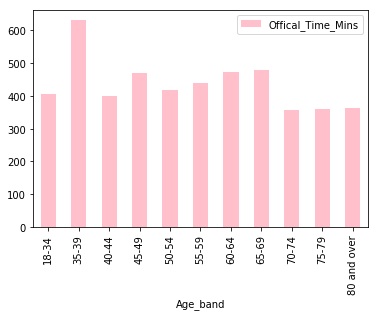

In [97]:

fastest_graph = lowest_timesf[['Age_band', "Offical_Time_Mins"]]
fastest_graph.plot(kind="bar", x="Age_band", y="Offical_Time_Mins", color='pink')

In [ ]:
This graph shows the fastest female runners by age group 

In [48]:
lowest_timesf=female_df.loc[female_df.groupby('Age_band' )['Offical_Time_Mins'].idxmax()]

These are the women with the fastest running times 

In [49]:
lowest_timesf


,10K,15K,20K,25K,30K,35K,40K,5K,Age,Bib,...,Overall,Pace,Proj Time,State,Unnamed: 0,Unnamed: 8,Unnamed: 9,year,Age_band,Offical_Time_Mins
53217,1:24:24,2:11:38,3:01:45,3:51:21,4:43:40,5:33:34,6:23:06,0:38:59,31,32031,...,26619,0:15:25,6:43:50,FL,NaN,NaN,NaN,2016,18-34,403.833333
53227,1:35:31,2:40:58,4:29:40,-,7:36:38,-,-,0:44:52,35,28487,...,26629,0:24:30,10:42:16,MA,NaN,MI,NaN,2016,35-39,630.383333
79624,1:17:02,2:05:58,2:52:33,3:43:32,4:37:51,5:31:18,6:18:21,0:35:47,44,25262,...,26398,0:15:12,-,TX,26396.0,NaN,MI,2017,40-44,398.416667
53223,1:32:01,2:28:49,3:28:27,4:27:32,5:24:12,6:29:20,-,0:47:03,46,31985,...,26625,0:17:51,7:47:56,CA,NaN,NaN,NaN,2016,45-49,467.933333
53221,1:21:10,2:04:58,2:59:33,3:55:16,4:52:13,5:45:43,6:36:56,0:37:50,52,26144,...,26623,0:15:59,6:58:53,TX,NaN,MI,NaN,2016,50-54,418.883333
79635,1:43:36,2:32:36,-,4:15:21,5:06:37,6:00:33,6:54:38,0:53:11,57,27086,...,26409,0:16:47,-,PA,26407.0,NaN,NaN,2017,55-59,439.616667
26594,1:39:39,2:39:13,3:35:58,4:32:44,5:31:58,6:28:56,7:26:19,0:48:36,61,31359,...,26595,0:17:59,-,ME,26594.0,NaN,NaN,2015,60-64,471.500000
26595,1:47:16,2:41:45,3:37:07,4:33:51,5:38:56,6:38:51,7:36:18,0:53:03,66,25559,...,26596,0:18:18,-,AZ,26595.0,NaN,NaN,2015,65-69,479.550000
26482,1:14:03,1:52:59,2:33:38,3:17:07,4:01:50,4:50:55,5:38:04,0:37:04,70,25511,...,26483,0:13:39,-,VA,26482.0,NaN,NaN,2015,70-74,357.666667
79494,1:14:44,1:54:43,2:37:41,3:22:01,4:12:16,4:58:39,5:41:51,0:35:41,77,25133,...,26268,0:13:42,-,NJ,26266.0,NaN,NaN,2017,75-79,358.966667


These are the women with the slowest running times 

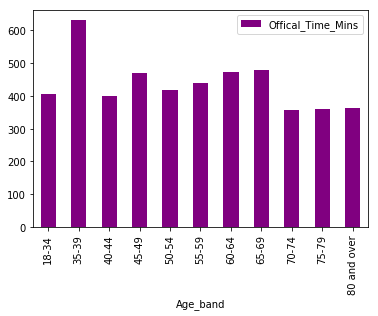

In [96]:

lowest_graph = lowest_timesf[['Age_band', "Offical_Time_Mins"]]
lowest_graph.plot(kind="bar", x="Age_band", y="Offical_Time_Mins", color='purple')

In [ ]:
this graph shows the slowest women runners by age group 

In [62]:
keep_cols = ['Offical_Time_Mins', 'Age_band']

In [59]:


women_run =pd.concat([lowest_timesf[keep_cols],fastest_timesf[keep_cols] ], axis=1)

In [66]:
compare=lowest_timesf[keep_cols].merge(fastest_timesf[keep_cols], on='Age_band')
                            

In [67]:
compare

,Offical_Time_Mins_x,Age_band,Offical_Time_Mins_y
0,403.833333,18-34,142.850000
1,630.383333,35-39,141.866667
2,398.416667,40-44,156.466667
3,467.933333,45-49,166.733333
4,418.883333,50-54,172.850000
5,439.616667,55-59,174.050000
6,471.500000,60-64,192.850000
7,479.550000,65-69,219.016667
8,357.666667,70-74,240.666667
9,358.966667,75-79,266.600000


I have now done a table comparing the fastest and slowest female runners for each age group

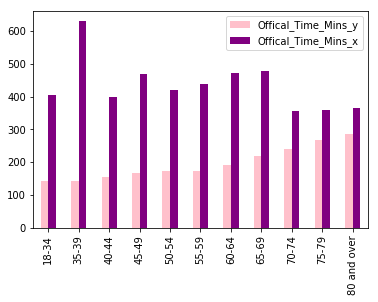

In [84]:
compare[['Offical_Time_Mins_y', 'Offical_Time_Mins_x']].plot(kind='bar', color=['pink','purple'])
plt.xticks(range(11),compare['Age_band']);

This graph visually shows the comparison between the fastest and slowest female runner per age group

In [109]:


com=compare[[ 'Offical_Time_Mins_y', 'Offical_Time_Mins_x']].mean().diff()

In [110]:
com

Offical_Time_Mins_y           NaN
Offical_Time_Mins_x    239.160606
dtype: float64

 I have now calculated the mean difference between the fastest and slowest women which is equivalent to 3:59.
 This shows the crazy disparity between runners within the same age group even in a race where you have to qualify 

I will now do the same analysis for male runners 

In [85]:
male_df = Yall[Yall['M/F'] == 'M']
male_df.head(10)

,10K,15K,20K,25K,30K,35K,40K,5K,Age,Bib,...,Overall,Pace,Proj Time,State,Unnamed: 0,Unnamed: 8,Unnamed: 9,year,Age_band,Offical_Time_Mins
0,0:29:43,0:44:57,1:00:29,1:16:07,1:32:00,1:47:59,2:02:39,0:14:43,25,3,...,1,0:04:56,-,NaN,0.0,NaN,NaN,2015,18-34,129.283333
1,0:29:43,0:44:58,1:00:28,1:16:07,1:31:59,1:47:59,2:02:42,0:14:43,30,4,...,2,0:04:58,-,NaN,1.0,NaN,NaN,2015,18-34,129.800000
2,0:29:43,0:44:57,1:00:29,1:16:07,1:32:00,1:47:59,2:03:01,0:14:43,29,8,...,3,0:04:59,-,NaN,2.0,NaN,NaN,2015,18-34,130.366667
3,0:29:44,0:45:01,1:00:29,1:16:07,1:32:00,1:48:03,2:03:47,0:14:43,28,11,...,4,0:05:00,-,NaN,3.0,NaN,NaN,2015,18-34,130.783333
4,0:29:44,0:44:58,1:00:28,1:16:07,1:32:00,1:47:59,2:03:27,0:14:43,32,10,...,5,0:05:00,-,NaN,4.0,NaN,NaN,2015,18-34,130.816667
5,0:29:45,0:44:59,1:00:29,1:16:07,1:32:00,1:47:59,2:03:18,0:14:44,30,9,...,6,0:05:00,-,NaN,5.0,NaN,NaN,2015,18-34,130.866667
6,0:29:45,0:45:20,1:00:43,1:16:05,1:31:59,1:48:06,2:04:05,0:14:45,32,14,...,7,0:05:01,-,MI,6.0,NaN,NaN,2015,18-34,131.333333
7,0:29:44,0:44:59,1:00:30,1:16:07,1:31:59,1:47:59,2:04:58,0:14:44,39,1,...,8,0:05:04,-,CA,7.0,NaN,NaN,2015,35-39,132.700000
8,0:29:43,0:44:58,1:00:28,1:16:07,1:32:00,1:48:00,2:04:39,0:14:43,27,5,...,9,0:05:06,-,NaN,8.0,NaN,NaN,2015,18-34,133.583333
9,0:30:34,0:46:05,1:01:43,1:17:18,1:33:11,1:49:43,2:06:16,0:15:14,33,16,...,10,0:05:07,-,NaN,9.0,NaN,NaN,2015,18-34,133.866667


In [86]:
fastest_timesm=male_df.loc[male_df.groupby('Age_band' )['Offical_Time_Mins'].idxmin()]

In [87]:
fastest_timesm

,10K,15K,20K,25K,30K,35K,40K,5K,Age,Bib,...,Overall,Pace,Proj Time,State,Unnamed: 0,Unnamed: 8,Unnamed: 9,year,Age_band,Offical_Time_Mins
0,0:29:43,0:44:57,1:00:29,1:16:07,1:32:00,1:47:59,2:02:39,0:14:43,25,3,...,1,0:04:56,-,NaN,0.0,NaN,NaN,2015,18-34,129.283333
7,0:29:44,0:44:59,1:00:30,1:16:07,1:31:59,1:47:59,2:04:58,0:14:44,39,1,...,8,0:05:04,-,CA,7.0,NaN,NaN,2015,35-39,132.700000
53233,0:30:28,0:45:44,1:01:15,1:16:59,1:33:01,1:48:52,2:05:21,0:15:25,40,15,...,6,0:05:04,-,AZ,5.0,NaN,NaN,2017,40-44,132.750000
29,0:32:20,0:48:43,1:06:06,1:23:36,1:41:36,1:59:54,2:17:02,0:15:58,46,83,...,30,0:05:32,-,NaN,29.0,NaN,NaN,2015,45-49,144.816667
26634,0:34:20,0:51:28,1:09:27,1:27:22,1:45:53,2:04:39,2:22:44,0:17:01,53,84,...,37,0:05:46,2:30:57,NaN,NaN,NaN,NaN,2016,50-54,150.950000
53554,0:37:18,0:56:53,1:16:45,1:36:14,1:56:10,2:16:18,2:36:04,0:18:23,56,371,...,327,0:06:18,-,VA,326.0,NaN,NaN,2017,55-59,164.866667
26883,0:37:48,0:57:08,1:16:44,1:36:06,1:56:27,2:17:03,2:37:07,0:18:40,60,806,...,286,0:06:20,2:45:47,IL,NaN,NaN,NaN,2016,60-64,165.783333
3567,0:42:33,1:03:32,1:25:59,1:47:41,2:10:05,2:32:47,2:54:58,0:21:34,66,4708,...,3568,0:07:04,-,NaN,3567.0,NaN,NaN,2015,65-69,184.916667
60189,0:47:18,1:10:56,1:34:35,1:58:13,2:22:36,2:48:06,3:15:27,0:23:45,70,9897,...,6963,0:08:00,-,FL,6961.0,NaN,NaN,2017,70-74,209.633333
11886,0:50:22,1:15:17,1:40:17,2:05:25,2:31:34,2:58:15,3:24:16,0:25:25,76,20278,...,11887,0:08:13,-,ON,11886.0,NaN,NaN,2015,75-79,215.350000


These are the men with the fastest running times 

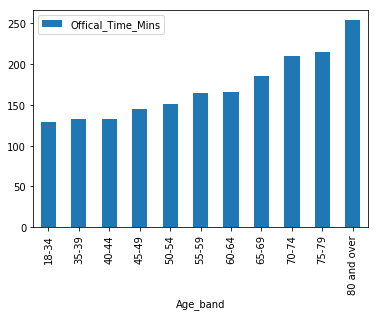

In [91]:
fast_graph2 = fastest_timesm[['Age_band', "Offical_Time_Mins"]]
fast_graph2.plot(kind="bar", x="Age_band", y="Offical_Time_Mins")

In [ ]:
This graph shows male runners fastest times per age group 

In [88]:
lowest_timesm=male_df.loc[male_df.groupby('Age_band' )['Offical_Time_Mins'].idxmax()]

In [89]:
lowest_timesm

,10K,15K,20K,25K,30K,35K,40K,5K,Age,Bib,...,Overall,Pace,Proj Time,State,Unnamed: 0,Unnamed: 8,Unnamed: 9,year,Age_band,Offical_Time_Mins
79634,1:05:33,1:52:17,2:49:41,3:50:19,4:50:01,5:53:48,6:54:21,0:32:03,25,25178,...,26408,0:16:40,-,NC,26406.0,NaN,MI,2017,18-34,436.983333
53226,1:15:09,1:58:09,2:49:15,4:07:15,5:27:59,6:49:51,7:59:12,0:35:58,35,30690,...,26628,0:19:17,8:25:09,TN,NaN,MI,NaN,2016,35-39,505.150000
53222,0:41:41,1:02:29,1:23:34,1:45:00,2:07:21,2:31:21,6:54:20,0:20:58,43,4358,...,26624,0:16:53,7:22:23,PA,NaN,NaN,NaN,2016,40-44,442.383333
79637,1:17:12,2:00:10,2:58:55,4:27:14,5:37:13,6:39:07,7:41:23,0:39:36,48,25266,...,26411,0:18:15,-,GA,26409.0,NaN,MI,2017,45-49,478.233333
26596,1:40:12,2:33:31,3:31:41,4:29:20,5:31:11,6:33:35,7:35:38,0:49:04,53,29396,...,26597,0:18:20,-,MA,26596.0,NaN,NaN,2015,50-54,480.616667
26591,1:23:34,2:08:29,2:55:21,3:44:46,4:38:41,5:33:09,6:33:45,0:39:52,57,25481,...,26592,0:15:57,-,IL,26591.0,NaN,MI,2015,55-59,417.833333
26597,1:28:18,2:26:46,3:28:41,4:36:06,5:43:44,6:51:31,7:41:28,0:40:14,62,25651,...,26598,0:18:33,-,NY,26597.0,NaN,MI,2015,60-64,486.016667
79629,1:10:13,1:56:07,2:50:10,3:44:08,4:41:33,5:42:35,6:31:28,0:32:16,68,15547,...,26403,0:15:40,-,IL,26401.0,NaN,NaN,2017,65-69,410.583333
26590,1:24:31,2:09:01,2:55:40,3:44:29,4:39:38,5:34:43,6:32:06,0:41:32,71,25647,...,26591,0:15:54,-,NC,26590.0,NaN,MI,2015,70-74,416.783333
53212,1:17:24,1:59:56,2:43:40,3:29:53,4:18:53,5:12:49,6:05:09,0:36:59,78,15528,...,26614,0:14:50,6:28:33,UT,NaN,NaN,NaN,2016,75-79,388.550000


These are the men with the slowest running times 

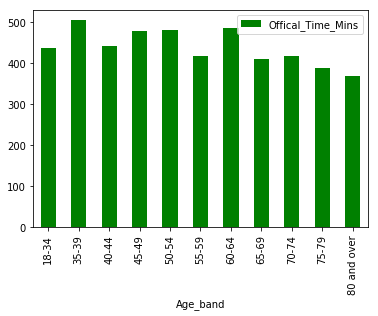

In [92]:
lowest_graph2 = lowest_timesm[['Age_band', "Offical_Time_Mins"]]
lowest_graph2.plot(kind="bar", x="Age_band", y="Offical_Time_Mins", color='green')

This graph shows the slowest times of males per age group 

In [98]:
keep_cols = ['Offical_Time_Mins', 'Age_band']

In [99]:
men_run =pd.concat([lowest_timesf[keep_cols],fastest_timesf[keep_cols] ], axis=1)

In [100]:
compare2=lowest_timesm[keep_cols].merge(fastest_timesm[keep_cols], on='Age_band')
                            

In [101]:
compare2

,Offical_Time_Mins_x,Age_band,Offical_Time_Mins_y
0,436.983333,18-34,129.283333
1,505.150000,35-39,132.700000
2,442.383333,40-44,132.750000
3,478.233333,45-49,144.816667
4,480.616667,50-54,150.950000
5,417.833333,55-59,164.866667
6,486.016667,60-64,165.783333
7,410.583333,65-69,184.916667
8,416.783333,70-74,209.633333
9,388.550000,75-79,215.350000


I have now done a table comparing the fastest and slowest male runners for each age group

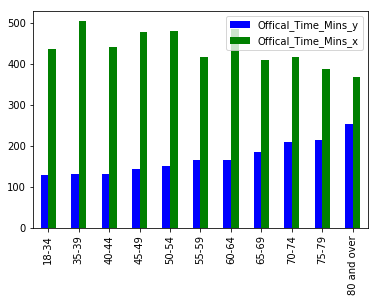

In [102]:
compare2[['Offical_Time_Mins_y', 'Offical_Time_Mins_x']].plot(kind='bar', color=['blue','green'])
plt.xticks(range(11),compare2['Age_band']);

This graph visually shows the comparison between the fastest and slowest female runner per age group

In [106]:
com2=compare2[[ 'Offical_Time_Mins_y', 'Offical_Time_Mins_x']].mean().diff()

In [108]:
com2

Offical_Time_Mins_y           NaN
Offical_Time_Mins_x    267.825758
dtype: float64

I have now calculated the mean difference between the fastest and slowest men which is equivalent to 4:27.
 This shows the crazy disparity between runners within the same age group even in a race where you have to qualify 



In [120]:
import numpy as np
import matplotlib.pyplot as plt


In [125]:
height = [239.160606, 267.825758]
bars = ('Women', 'Men')
y_pos = np.arange(len(bars))


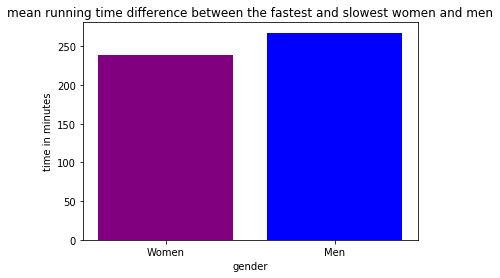

In [132]:
plt.bar(y_pos, height, color=['purple', 'blue'])
plt.xticks(y_pos, bars)
plt.title('mean running time difference between the fastest and slowest women and men')
plt.xlabel('gender')
plt.ylabel('time in minutes')
plt.show()


This graph shows the mean running time difference between the fastest and slowest women and men respectively 

In [127]:
compare

,Offical_Time_Mins_x,Age_band,Offical_Time_Mins_y
0,403.833333,18-34,142.850000
1,630.383333,35-39,141.866667
2,398.416667,40-44,156.466667
3,467.933333,45-49,166.733333
4,418.883333,50-54,172.850000
5,439.616667,55-59,174.050000
6,471.500000,60-64,192.850000
7,479.550000,65-69,219.016667
8,357.666667,70-74,240.666667
9,358.966667,75-79,266.600000


In [130]:
compare['Offical_Time_Mins_x'].mean()	

435.53333333333336

This is the mean running time for the slowest women which is equivalent to 7:15

In [131]:
compare['Offical_Time_Mins_y'].mean()	

196.3727272727273

This is the mean running time for the fastest women which is equivalent to 3:16

In [133]:
height = [435.53333333333336, 196.3727272727273]
bars = ('slowest Women', 'Fastest Women')
y_pos2 = np.arange(len(bars))



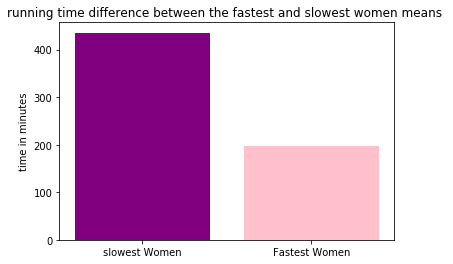

In [135]:
plt.bar(y_pos, height, color=['purple', 'pink'])
plt.xticks(y_pos2, bars)
plt.title('running time difference between the fastest and slowest women means ')
plt.xlabel('')
plt.ylabel('time in minutes')
plt.show()



This graph shows running time difference between the fastest and slowest women means
This is equivalent to 3:59

In [136]:
compare2

,Offical_Time_Mins_x,Age_band,Offical_Time_Mins_y
0,436.983333,18-34,129.283333
1,505.150000,35-39,132.700000
2,442.383333,40-44,132.750000
3,478.233333,45-49,144.816667
4,480.616667,50-54,150.950000
5,417.833333,55-59,164.866667
6,486.016667,60-64,165.783333
7,410.583333,65-69,184.916667
8,416.783333,70-74,209.633333
9,388.550000,75-79,215.350000


In [137]:
compare2['Offical_Time_Mins_x'].mean()	

439.209090909091

This is the mean running time for the slowest men which is equivalent to 7:19

In [138]:
compare2['Offical_Time_Mins_y'].mean()	

171.38333333333333

This is the mean running time for the fastest men which is equivalent to 2:51

In [139]:
height = [439.209090909091, 171.38333333333333]
bars = ('slowest Men', 'Fastest Men')
y_pos3 = np.arange(len(bars))

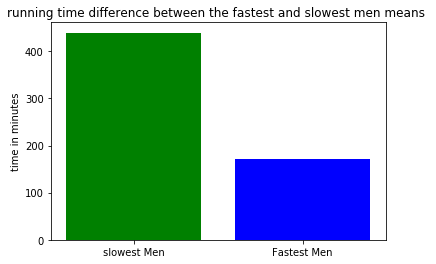

In [140]:
plt.bar(y_pos, height, color=['green', 'blue'])
plt.xticks(y_pos3, bars)
plt.title('running time difference between the fastest and slowest men means ')
plt.xlabel('')
plt.ylabel('time in minutes')
plt.show()

This graph shows running time difference between the fastest and slowest women means
This is equivalent to 4:29

In [143]:
men_v_women= 196.3727272727273 - 171.38333333333333

In [144]:
men_v_women

24.989393939393977

The difference between the mean running time for the fastest men and women is close to 25. 
This is the Same as the mean disparity found between all male and female runners.
This further suggest that perhaps the qualifying time difference between gender should be 25 minutes instead of 30

In [145]:
height = [196.3727272727273, 171.38333333333333]
bars = ('Fastesest Men', 'Fastest Women')
y_pos4 = np.arange(len(bars))

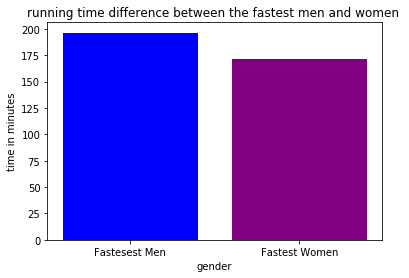

In [147]:
plt.bar(y_pos, height, color=['blue', 'purple'])
plt.xticks(y_pos4, bars)
plt.title('running time difference between the fastest men and women ')
plt.xlabel('gender')
plt.ylabel('time in minutes')
plt.show()

This graph shows the running time difference between the fastest men and women